In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
import networkx as nx
import numpy as np

In [6]:
from IPython.display import clear_output

def interactive_graph(size=5, directed=False):
    adj = np.random.rand(size, size)
    if not directed:
        adj = (adj + adj.T) / 2
    adj[adj>0.5] = 1
    adj[adj<=0.5] = 0
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    fig.set_label('Interactive Visualization')
    ax[0].set_xlim(0-0.5, size-0.5)
    ax[0].set_ylim(0-0.5, size-0.5)
    ax[0].invert_yaxis()
    ax[0].set_title('Adjacency Matrix')
    ax[1].set_title('Graph')

    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    G.add_nodes_from(list(range(size)))
    for r in range(size):
        if directed:
            for c in range(size):
                if adj[r, c] == 0:
                    G.add_edge(r, c)

        for c in range(r, size):
            if adj[r, c] == 0:
                G.add_edge(r, c)
    ax[0].imshow(adj, cmap='gray', vmin=0, vmax=1)
    nx.draw_circular(G, with_labels=True, alpha=0.5, ax=ax[1])

    def onclick(event):
        x, y = int(event.xdata+0.5), int(event.ydata+0.5)
        adj[y, x] = 1-adj[y, x]
        if adj[y, x]==0:
            G.add_edge(y, x)
        else:
            G.remove_edge(y, x)
        if x!=y and not directed:
            adj[x, y] = 1-adj[x, y]
        clear_output()
        ax[0].clear()
        ax[1].clear()
        ax[0].set_title('Adjacency Matrix')
        ax[1].set_title('Graph')
        ax[0].imshow(adj, cmap='gray', vmin=0, vmax=1)
        nx.draw_circular(G, with_labels=True, alpha=0.5, ax=ax[1])

    cid = fig.canvas.mpl_connect('button_press_event', onclick)

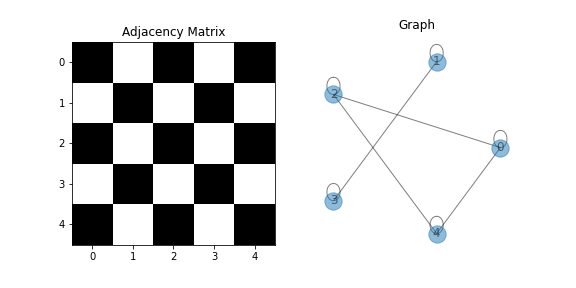

In [8]:
interactive_graph(size=5, directed=False)